In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('datasets/cleaned/merged_fx_dataset.csv')

In [4]:
df.shape

(4217, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4217 non-null   object 
 1   Buying           4217 non-null   float64
 2   Selling          4217 non-null   float64
 3   MidRate          4217 non-null   float64
 4   MPR              4217 non-null   float64
 5   GhInflationRate  4217 non-null   float64
 6   BrentOil         4217 non-null   float64
 7   Cocoa            4217 non-null   float64
 8   Gold             4217 non-null   float64
 9   GhInterestRate   4217 non-null   float64
 10  GhGDP            4217 non-null   float64
 11  USGDP            4217 non-null   float64
 12  USInflationRate  4217 non-null   float64
 13  USInterestRate   4217 non-null   float64
dtypes: float64(13), object(1)
memory usage: 461.4+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buying,4217.0,4.625836,3.591187,0.00000,1.70050,3.94430,5.6998,16.4118
Selling,4217.0,4.639018,3.587234,0.00000,1.73450,3.94830,5.7056,16.4282
MidRate,4217.0,4.632440,3.589196,0.00000,1.71750,3.94630,5.7027,16.4200
MPR,4217.0,18.941902,5.200142,12.50000,15.00000,17.00000,22.0000,30.0000
GhInflationRate,4217.0,15.501468,9.615771,4.67000,9.02000,12.78000,18.3100,54.1000
BrentOil,4217.0,78.609240,24.506153,26.62570,59.47450,75.70000,103.3000,134.8000
Cocoa,4217.0,3142.189529,3009.582545,1904.60000,2365.77270,2622.30000,3010.1000,40370.0000
Gold,4217.0,1471.200405,387.074520,760.80000,1220.80770,1339.20000,1746.9000,2689.3800
GhInterestRate,4217.0,18.892103,5.561471,6.35000,13.82250,17.50000,24.1350,30.1900
GhGDP,4217.0,34971.757822,8996.061765,17762.60476,29523.17203,34440.53602,42222.2000,53957.1000


In [25]:
df['Date'] = pd.to_datetime(df['Date'])

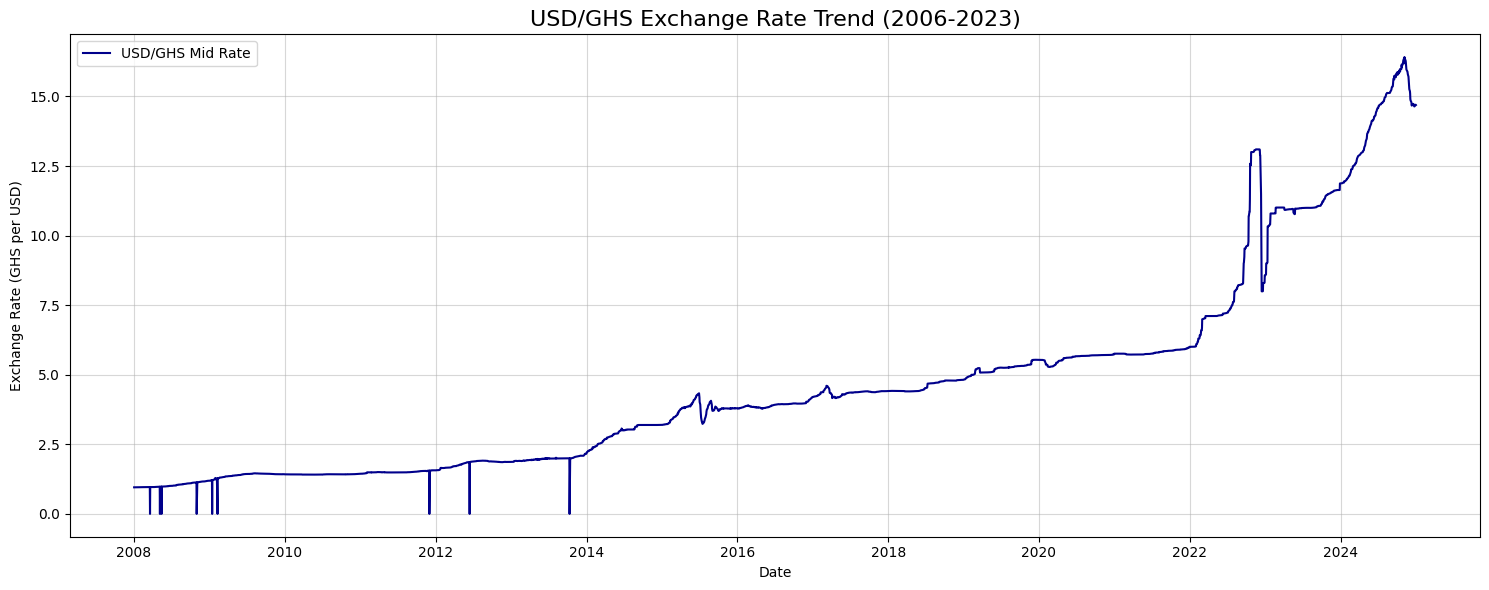

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Buying'],
         label='USD/GHS Mid Rate', color='darkblue')
plt.title('USD/GHS Exchange Rate Trend (2006-2023)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Exchange Rate (GHS per USD)')
plt.grid(True, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
correlation_matrix = df.copy().drop(columns=['Date', 'MidRate', 'Selling']).corr()

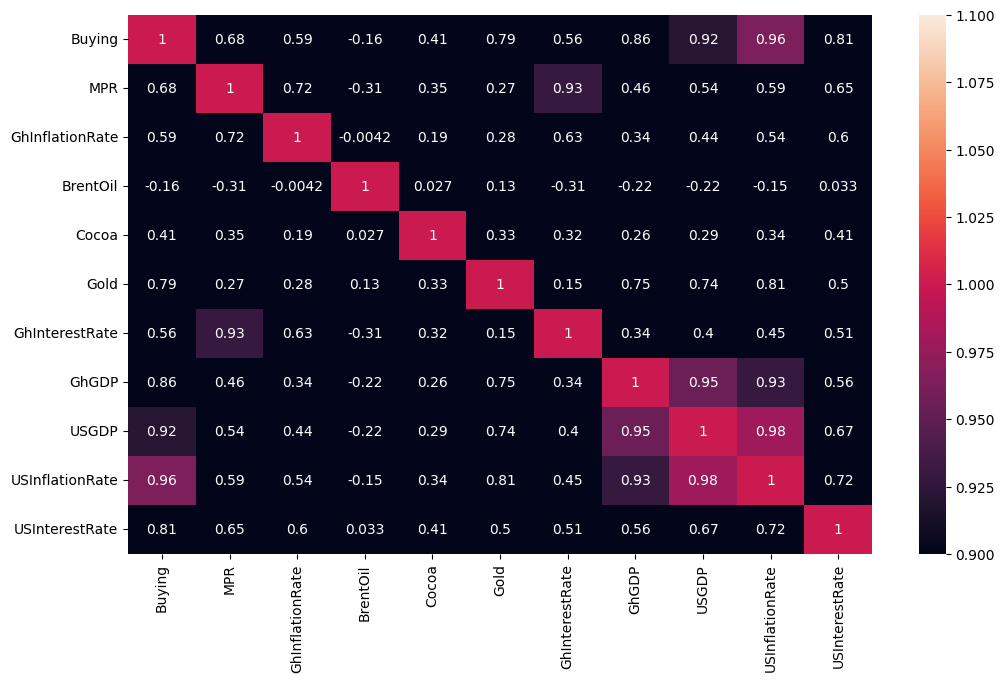

In [19]:
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True,vmin=1, vmax=1)
plt.show()

In [27]:
features_to_drop = ['Selling', 'MidRate', 'GhInterestRate']
ds = df.copy().drop(columns=features_to_drop)

In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4217 non-null   datetime64[ns]
 1   Buying           4217 non-null   float64       
 2   MPR              4217 non-null   float64       
 3   GhInflationRate  4217 non-null   float64       
 4   BrentOil         4217 non-null   float64       
 5   Cocoa            4217 non-null   float64       
 6   Gold             4217 non-null   float64       
 7   GhGDP            4217 non-null   float64       
 8   USGDP            4217 non-null   float64       
 9   USInflationRate  4217 non-null   float64       
 10  USInterestRate   4217 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 362.5 KB


In [41]:
y = ds['Buying'].values.reshape(-1, 1)
x = ds.drop(columns=['Buying', 'Date']).values

In [42]:
x.shape, y.shape

((4217, 9), (4217, 1))

In [43]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(x, y)

/Users/dela/Developer/thesis/.venv/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
model_feature_importance = regressor.feature_importances_

In [61]:
d = ds.drop(columns=['Date', 'Buying'])

In [64]:
feature_importance = pd.DataFrame({
    'Feature': d.columns.tolist(),
    'Importance': model_feature_importance
}).sort_values(by='Importance', ascending=False)

In [66]:
feature_importance

,Feature,Importance
7,USInflationRate,0.965987
4,Gold,0.012774
6,USGDP,0.009246
1,GhInflationRate,0.004437
0,MPR,0.002531
8,USInterestRate,0.001621
5,GhGDP,0.001552
2,BrentOil,0.001474
3,Cocoa,0.000377


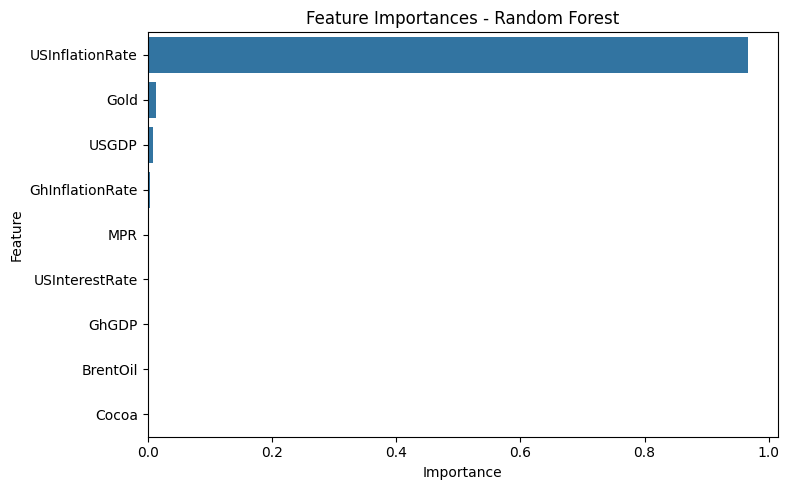

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title(f"Feature Importances - Random Forest")
plt.tight_layout()
plt.show()